In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [16]:
session = Session(engine)

In [17]:
# Total dates
total_date=session.query(func.count(Measurement.date)).all()
total_date

[(19550)]

In [18]:
#first date
first_date=session.query(Measurement.date).order_by(Measurement.date).first()
first_date

('2010-01-01')

In [19]:
#last date 
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
#print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
#query_1=session.query(Measurement.date,func.sum(Measurement.prcp)).\
#    filter(Measurement.date >query_date).group_by(Measurement.date).order_by(Measurement.date).all()

query_2=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#p1=pd.DataFrame(data=query_1,columns=["date","preci"])
p2=pd.DataFrame(data=query_2,columns=["date","preci"])
p2.shape
# Sort the dataframe by date
#p1.sort_values('date',inplace=True)
p2.sort_values('date',inplace=True)

In [21]:
# fist 5 element 
query_2[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [22]:

# sum of measurement for one day in all stations


# Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize=(20,5))
# plt.bar(p1.date,p1.preci)
# plt.tight_layout()
# plt.show()

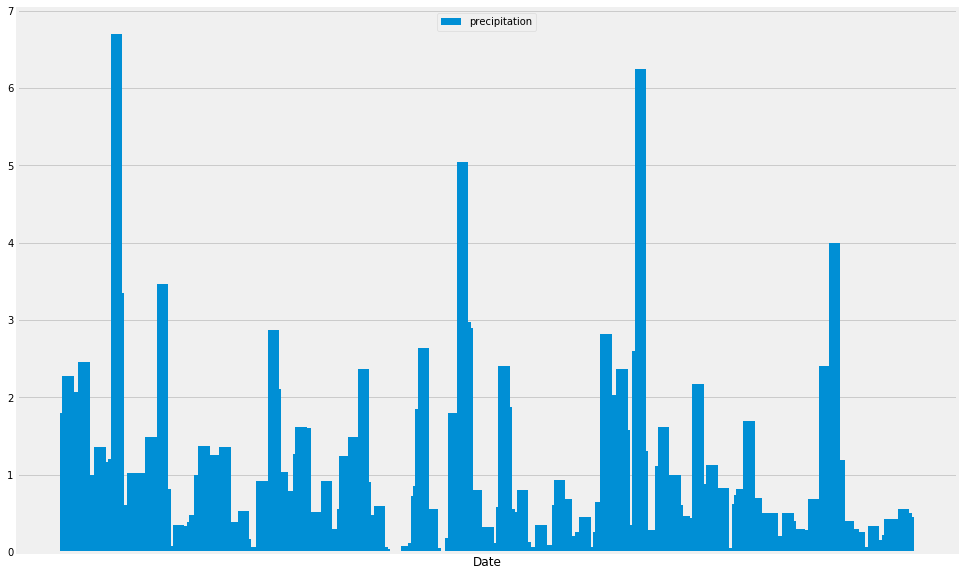

In [23]:
## precipation  measurement for one day 

plt.figure(figsize=(15,10))

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(p2.date,p2.preci,label='precipitation',width=5)

plt.legend(loc='upper center')
plt.xlabel('Date')
plt.xticks([])

plt.show()

![precipitation](Images/precipitation.png)

In [24]:
#summary statistics for the precipitation data----
#p1.describe()

In [25]:
#summary statistics for the precipitation data----
p2.describe()

,preci
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [27]:
#how many station we have
session.query(Measurement.station).group_by(Measurement.station).count()


9

In [28]:
# id for each of 9 station
session.query(Measurement.station).group_by(Measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query_st=session.query(Measurement.station,func.count(Measurement.id))\
    .group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
query_st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query_st2=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs),)\
    .filter(Measurement.station=='USC00519281').first()
query_st2

(54.0, 85.0, 71.66378066378067)

In [32]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_pl3=session.query(Measurement.date,Measurement.tobs)\
    .filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date >query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#p1=pd.DataFrame(data=query_1,columns=["date","preci"])
p3=pd.DataFrame(data=query_pl3,columns=["date","tobs"])
p3.set_index("date",inplace=True)
p3.tobs.value_counts()



74.0    39
75.0    33
76.0    33
77.0    31
70.0    22
78.0    22
72.0    22
69.0    19
73.0    18
79.0    18
71.0    18
67.0    15
68.0    12
80.0    11
65.0     7
62.0     6
66.0     5
63.0     4
81.0     4
82.0     3
64.0     3
59.0     3
60.0     2
61.0     1
83.0     1
Name: tobs, dtype: int64

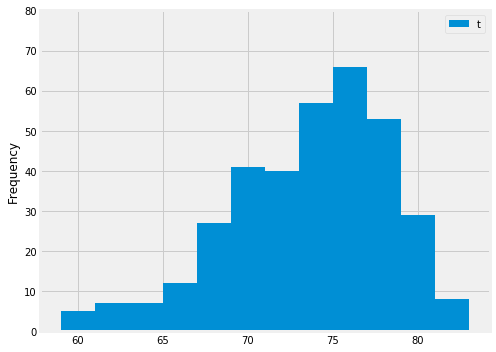

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(7,5))
plt.hist(p3.tobs,bins=12)
plt.ylabel("Frequency")
plt.legend('tobs',loc='upper right',markerscale=2)
plt.yticks(np.arange(0, 90, 10))

plt.tight_layout()

plt.show()

![precipitation](Images/station-histogram.png)

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# my_travel_date='2019-10-27'
# two_year_before= dt.date(2019,10,27) - dt.timedelta(days=366*2)
# two_year_before
# end_of_travel=two_year_before + dt.timedelta(days=5)
# two_year_before,end_of_travel

# x.strftime("%m")
my_travel_temp=calc_temps('2012-02-28', '2012-03-05')
my_travel_temp

[(62.0, 69.57142857142857, 74.0)]

In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-10-23', '2016-10-28'))


[(68.0, 75.975, 81.0)]


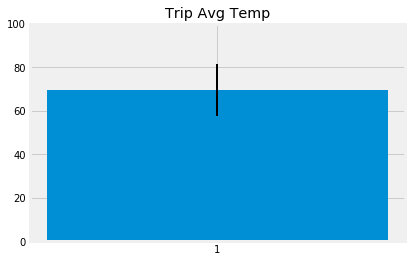

In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#plt.axis([0, 1, 0, 100])
plt.ylim(0,100)


plt.bar(x="1",height=my_travel_temp[0][1],width=.1)
yerrr=my_travel_temp[0][2]-my_travel_temp[0][0]
plt.errorbar(x="1",y=my_travel_temp[0][1],yerr=yerrr, capsize=0, ls='none', color='black',linewidth=2)
plt.grid(axis='y', linestyle='-')
plt.title('Trip Avg Temp')


plt.show()

In [38]:
start_date ='2016-07-23'
end_date='2016-07-28'


In [39]:
sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
last_query= session.query(*sel).filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)\
.group_by(Measurement.station)\
.order_by(func.sum(Measurement.prcp).desc()).all()
last_query

[('USC00519281',
  'WAIHEE 837.5, HI US',
  11.120000000000001,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  8.169999999999998,
  21.3331,
  -157.8025,
  152.4),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  7.9799999999999995,
  21.4234,
  -157.8015,
  14.6),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 4.33, 21.2716, -157.8168, 3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  3.19,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.05,
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 0.01, 21.3934, -157.9751, 11.9)]

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [53]:
start_date ='2018-01-01'
end_date='2018-01-07'
e=dt.date(2018,1,7)
s=dt.date(2018,1,1)
d=e-s
i=s
results=[]
while (i<=e):
        results.append(tuple(np.ravel(daily_normals(i.strftime("%m-%d")))))
        i+=dt.timedelta(days=1)
        

print(results)

[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [55]:
i=s
date_index=[]
while (i<=e):
        date_index.append(i.isoformat())
        i+=dt.timedelta(days=1)
print(date_index)

['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07']


In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip


# Use the start and end date to create a range of dates


# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [57]:
results_pd=pd.DataFrame(data=results,index=date_index,columns=['tmin','tavg','tmax'])
results_pd

,tmin,tavg,tmax
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


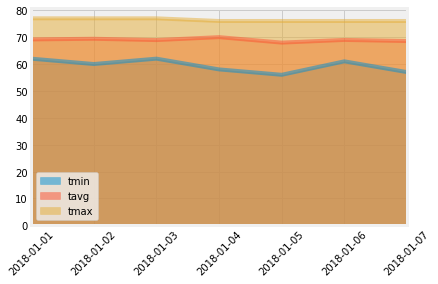

In [69]:
#plt.xticks(ticks=[1,2,3,4,5,6,7], labels=results_pd.index)
#plt.stackplot(results_pd.index,results_pd.tmin,results_pd.tavg,results_pd.tmax,stacked=False)
results_pd.plot(kind='area', stacked=False,rot=45)
#plt.show()


<IPython.core.display.Javascript object>


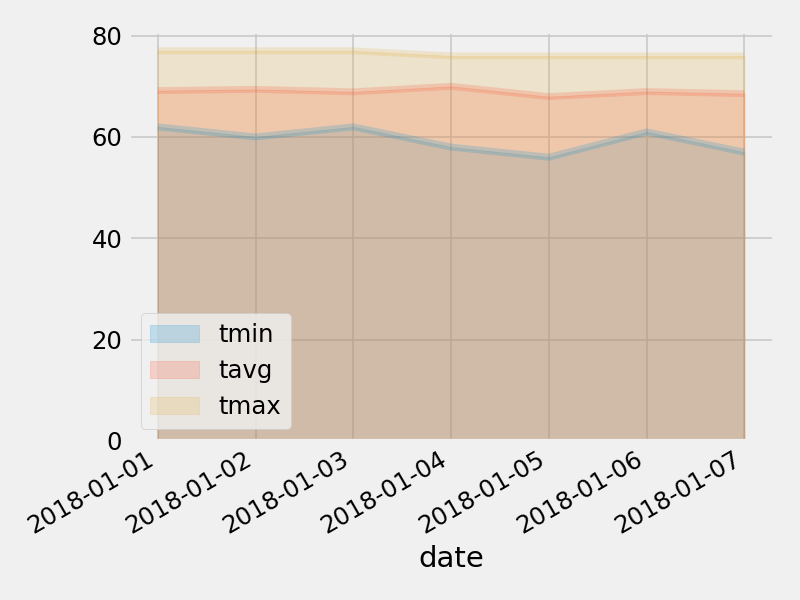

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
